In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [58]:
df=pd.read_excel('data_model.xlsx',index_col=0)
df.head()

,type,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,location,rate persqft,area insqft,construction status,property type,Bhk,price(L)
0,1 BHK Apartment,17.403968,78.483456,yes,yes,Furnished,1,New,Himayat Nagar,1846,650,Under Construction,Apartment,1,12.00
1,1 BHK Apartment,17.463173,78.286484,yes,yes,Unfurnished,2,New,Tellapur,2406,1205,Under Construction,Apartment,1,28.99
2,1 BHK Apartment,17.489849,78.293930,yes,yes,Unfurnished,2,New,BHEL,2406,1205,Under Construction,Apartment,1,28.99
3,1 BHK Apartment,17.536715,78.362610,yes,yes,Unfurnished,1,Resale,Whisper Valley,2881,590,Ready to move,Apartment,1,17.00
4,1 BHK Apartment,17.497248,78.503426,yes,yes,Unfurnished,2,New,Alwal,2406,1205,Under Construction,Apartment,1,28.99


In [59]:
df.shape

(13597, 15)

In [60]:
df.drop(labels=['type','location','rate persqft'],axis=1,inplace=True)

In [61]:
df.shape

(13597, 12)

In [62]:
df

,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,area insqft,construction status,property type,Bhk,price(L)
0,17.403968,78.483456,yes,yes,Furnished,1,New,650,Under Construction,Apartment,1,12.00
1,17.463173,78.286484,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
2,17.489849,78.293930,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
3,17.536715,78.362610,yes,yes,Unfurnished,1,Resale,590,Ready to move,Apartment,1,17.00
4,17.497248,78.503426,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
5,17.534964,78.402245,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
6,17.485710,78.396866,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
7,17.391747,78.495956,yes,yes,Unfurnished,2,Resale,810,Ready to move,IndependentHouse,1,125.00
8,17.526516,78.358185,yes,yes,Semi-Furnished,2,Resale,1025,Ready to move,Apartment,1,27.00
9,17.402847,78.497955,yes,yes,Semi-Furnished,2,Resale,1000,Ready to move,Apartment,1,60.00


In [63]:
df.columns

Index(['latitude', 'longitude', 'power backup', 'lift', 'furninture status',
       'bathrooms', 'status of building', 'area insqft', 'construction status',
       'property type', 'Bhk', 'price(L)'],
      dtype='object')

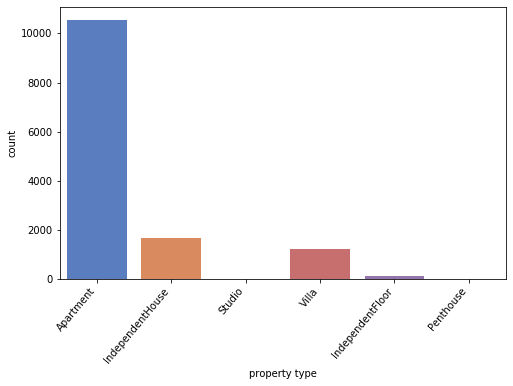

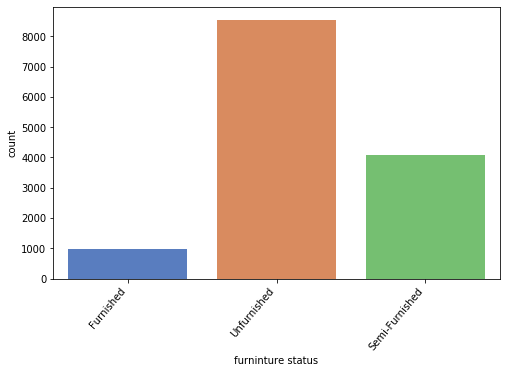

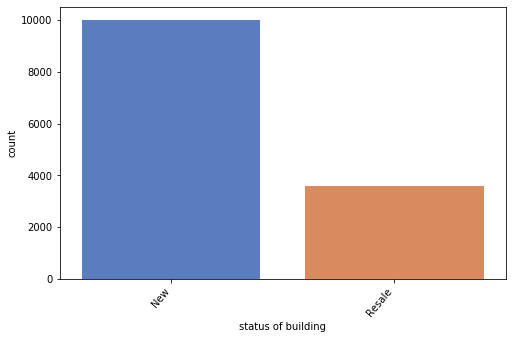

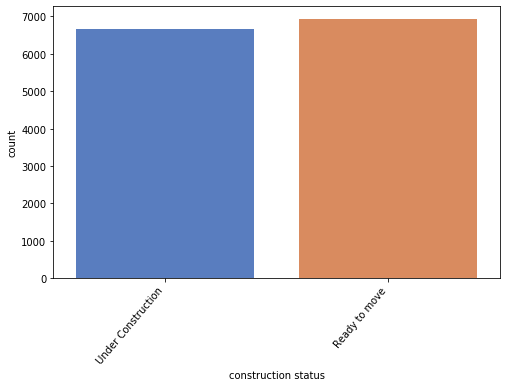

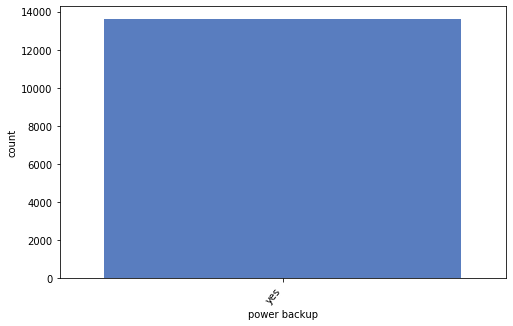

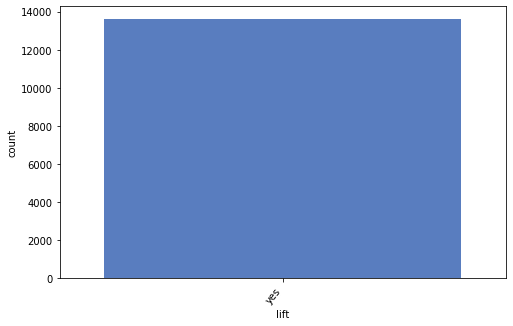

In [64]:
l1 = ['property type','furninture status','status of building','construction status','power backup','lift']
for i in l1:
    fig,ax=plt.subplots(figsize=(8,5))
    sns.countplot(df[i],palette='muted',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
    plt.show()
    
    
    

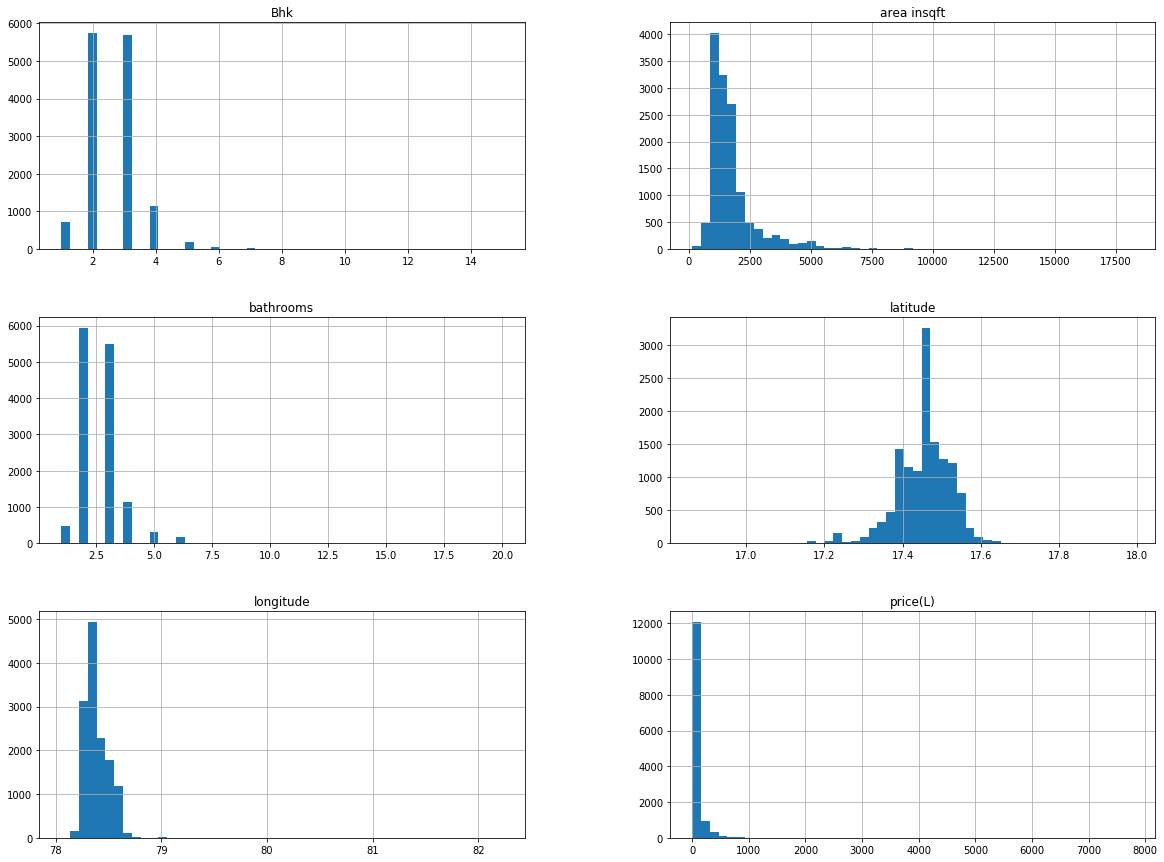

In [65]:
df.hist(bins=50, figsize=(20,15))
plt.show()

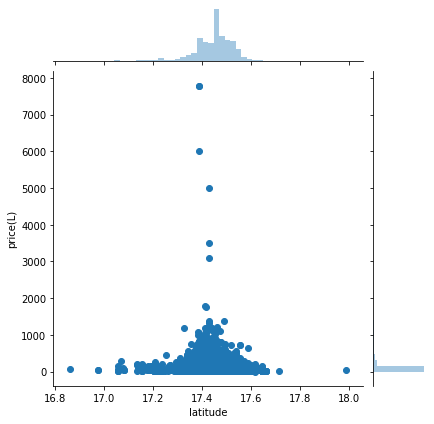

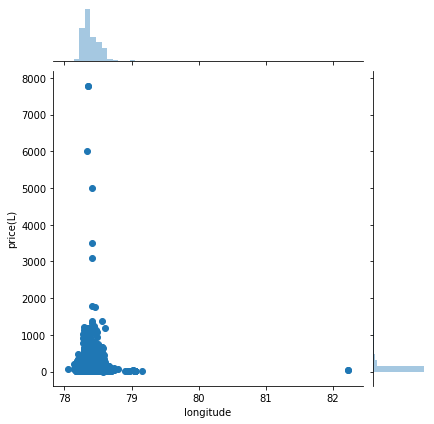

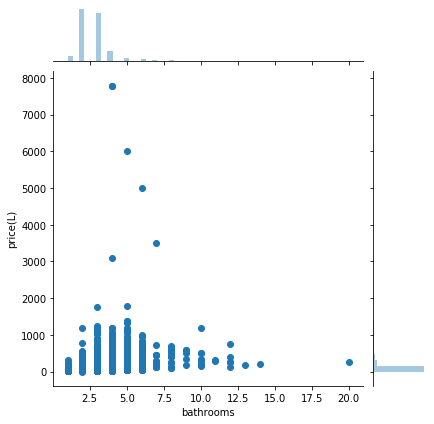

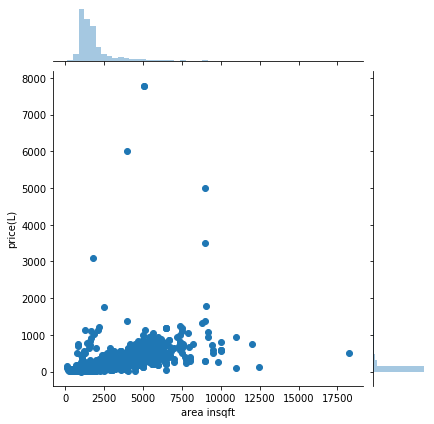

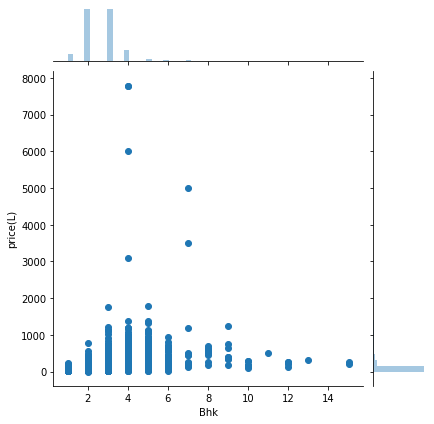

In [66]:
lst=['latitude','longitude','bathrooms','area insqft','Bhk']
for i in lst:
    sns.jointplot(df[i],df['price(L)'],data=df)
    plt.show()

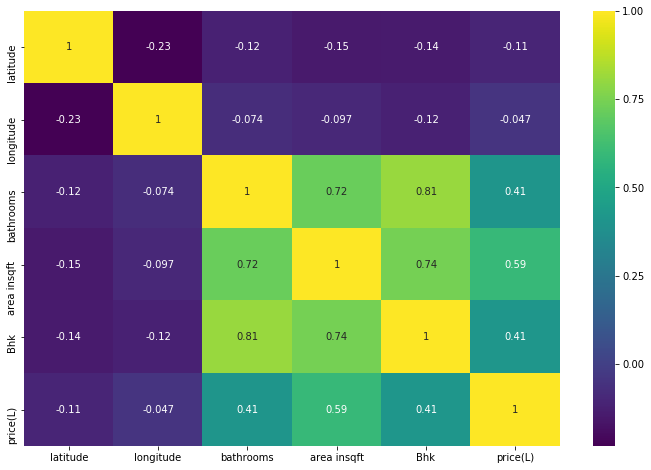

In [67]:
corr = df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr,annot=True, cmap="viridis")

In [68]:
df.corr()

,latitude,longitude,bathrooms,area insqft,Bhk,price(L)
latitude,1.000000,-0.231475,-0.119787,-0.148444,-0.142999,-0.106215
longitude,-0.231475,1.000000,-0.073796,-0.096721,-0.118467,-0.046708
bathrooms,-0.119787,-0.073796,1.000000,0.718921,0.811455,0.408883
area insqft,-0.148444,-0.096721,0.718921,1.000000,0.741885,0.591720
Bhk,-0.142999,-0.118467,0.811455,0.741885,1.000000,0.413564
price(L),-0.106215,-0.046708,0.408883,0.591720,0.413564,1.000000


In [69]:
df.head()

,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,area insqft,construction status,property type,Bhk,price(L)
0,17.403968,78.483456,yes,yes,Furnished,1,New,650,Under Construction,Apartment,1,12.00
1,17.463173,78.286484,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
2,17.489849,78.293930,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
3,17.536715,78.362610,yes,yes,Unfurnished,1,Resale,590,Ready to move,Apartment,1,17.00
4,17.497248,78.503426,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99


In [70]:
df = df[['latitude', 'longitude', 'power backup', 'lift',
       'furninture status', 'bathrooms', 'status of building',
        'area insqft', 'construction status',
       'property type', 'Bhk','price(L)']]

In [71]:
df.head(1)

,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,area insqft,construction status,property type,Bhk,price(L)
0,17.403968,78.483456,yes,yes,Furnished,1,New,650,Under Construction,Apartment,1,12.0


In [72]:
df1=pd.get_dummies(df, drop_first= True)

In [73]:
df1.head(5)

,latitude,longitude,bathrooms,area insqft,Bhk,price(L),furninture status_Semi-Furnished,furninture status_Unfurnished,status of building_Resale,construction status_Under Construction,property type_IndependentFloor,property type_IndependentHouse,property type_Penthouse,property type_Studio,property type_Villa
0,17.403968,78.483456,1,650,1,12.00,0,0,0,1,0,0,0,0,0
1,17.463173,78.286484,2,1205,1,28.99,0,1,0,1,0,0,0,0,0
2,17.489849,78.293930,2,1205,1,28.99,0,1,0,1,0,0,0,0,0
3,17.536715,78.362610,1,590,1,17.00,0,1,1,0,0,0,0,0,0
4,17.497248,78.503426,2,1205,1,28.99,0,1,0,1,0,0,0,0,0


In [74]:
df1.shape

(13597, 15)

In [75]:
len(df1.columns)

15

# Build a Model

In [76]:
df1.rename(columns={'area insqft': 'areainsqft',
                   'furninture status_Semi-Furnished' :'furniture_Semi',
                   'furninture status_Unfurnished' :'furniture_Unfurnished',
                   'status of building_Resale': 'building_Resale',
                   'construction status_Under Construction' : 'Under_Construction',
                   'property type_IndependentFloor' : 'IndependentFloor',
                   'property type_IndependentHouse' : 'IndependentHouse',
                   'property type_Penthouse' : 'Penthouse',
                   'property type_Studio' : 'Studio',
                   'property type_Villa'  : 'Villa',
                   'price(L)' : 'price'},inplace=True)



In [77]:
df1.head(3)

,latitude,longitude,bathrooms,areainsqft,Bhk,price,furniture_Semi,furniture_Unfurnished,building_Resale,Under_Construction,IndependentFloor,IndependentHouse,Penthouse,Studio,Villa
0,17.403968,78.483456,1,650,1,12.00,0,0,0,1,0,0,0,0,0
1,17.463173,78.286484,2,1205,1,28.99,0,1,0,1,0,0,0,0,0
2,17.489849,78.293930,2,1205,1,28.99,0,1,0,1,0,0,0,0,0


In [78]:
df1.columns

Index(['latitude', 'longitude', 'bathrooms', 'areainsqft', 'Bhk', 'price',
       'furniture_Semi', 'furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa'],
      dtype='object')

In [79]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [80]:
# model with all features
# y=using stats model
model_all=sm.OLS.from_formula('price~latitude+longitude+bathrooms+Bhk+areainsqft+furniture_Semi+furniture_Unfurnished+building_Resale+Under_Construction+IndependentFloor+IndependentHouse+Penthouse+Studio+Villa',data=df1).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     538.6
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:31:14   Log-Likelihood:                -85463.
No. Observations:               13597   AIC:                         1.710e+05
Df Residuals:                   13582   BIC:                         1.711e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2196.16

In [81]:
df1.columns

Index(['latitude', 'longitude', 'bathrooms', 'areainsqft', 'Bhk', 'price',
       'furniture_Semi', 'furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa'],
      dtype='object')

In [82]:
data = df1[['latitude', 'longitude', 'bathrooms', 'areainsqft',
       'Bhk','furniture_Semi','furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa','price',]]

In [83]:
data.shape

(13597, 15)

In [84]:
X = data.iloc[:,:14]
Y = data.iloc[:,-1] 

In [85]:
Y.shape,X.shape

((13597,), (13597, 14))

In [86]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 14
Score with 14 features: 0.515602


In [87]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 14)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['latitude', 'longitude', 'bathrooms', 'areainsqft', 'Bhk',
       'furniture_Semi', 'furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa'],
      dtype='object')


In [88]:
X1 = data.iloc[:,:14]
Y1= data.iloc[:,-1] 

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 0)

In [90]:
reg = LinearRegression()

In [91]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
reg.score(x_test,y_test)

0.5156021926075025

In [94]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 4, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [95]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
clf.score(x_test,y_test)

0.79826401771232